# Q4. How does population density relate to average price? How does the population denisty vary between city and suburb? is there a difference in average price between city and suburb? is city/suburb a strong measurement for price overall?

In [3]:
## 1/ simple line graph
# 2/ displot of densities
# 3/ two line line plot
# 4/ np.corrcoef

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
zipcode = [98178, 98125, 98028, 98136, 98074, 98053, 98003, 98198, 98146, 98038, 98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133, 98040, 98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058, 98001, 98056, 98166, 98023, 98070, 98148, 98105, 98042, 98008, 98059, 98122, 98144, 98004, 98005, 98034, 98075, 98116, 98010, 98118, 98199, 98032, 98045, 98102, 98077, 98108, 98168, 98177, 98065, 98029, 98006, 98109, 98022, 98033, 98155, 98024, 98011, 98031, 98106, 98072, 98188, 98014, 98055, 98039]
pop_density = [4966, 6879, 3606, 6425, 2411, 662, 3800, 4441, 5573, 469, 5684, 7018, 9602, 6732, 141, 9905, 4423, 6279, 3591, 892, 4741, 8638, 6667, 2908, 469, 7953, 2215, 1717, 4323, 3580, 4604, 288, 3194, 10643, 1537, 4437, 1725, 13594, 7895, 3977, 2361, 4428, 2185,  7523, 334, 6841, 4714, 2024, 41, 15829, 785, 2989, 3794, 3341, 171, 2719, 3402, 10361, 52,3696, 4330, 236, 3569, 4877, 4161, 1231, 3062, 149, 4585, 2059] 
lists = list(zip(zipcode, pop_density)) 
pop_density_by_zip = pd.DataFrame(lists, columns = ['zipcode', 'pop_density']) 

df = pd.read_csv("data/king_county_data_clean.csv").drop('Unnamed: 0', axis=1)
df = pd.merge(left = df, right = pop_density_by_zip, on = 'zipcode', how='left')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,pop_density
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,1180,0,1955,0.0,98178,47.5112,-122.257,1340,5650,4966
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,2170,400,1951,1991.0,98125,47.7210,-122.319,1690,7639,6879
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,770,0,1933,0.0,98028,47.7379,-122.233,2720,8062,3606
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1050,910,1965,0.0,98136,47.5208,-122.393,1360,5000,6425
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1680,0,1987,0.0,98074,47.6168,-122.045,1800,7503,2411


In [6]:
options = [98155, 98177, 98133, 98155, 98125, 98117, 98103, 98115, 98105, 98102, 98112, 98109, 98107, 98119, 98199, 98122, 98144, 98134, 98108, 98118, 98168, 98106, 98126, 98136, 98116, 98146, 98178, 98121, 98101, 98154, 98104]  
seattle_proper = df[df['zipcode'].isin(options)] 
#seattle_proper

non_city_options = [98028, 98074, 98053, 98003, 98198, 98038, 98007, 98019, 98002, 98040, 98092, 98030, 98052, 98027, 98058, 98001, 98056, 98166, 98023, 98070, 98148, 98042, 98008, 98059, 98004, 98005, 98034, 98075, 98010, 98032, 98045, 98077, 98065, 98029, 98006, 98022, 98033, 98024, 98011, 98031, 98072, 98188, 98014, 98055, 98039]
burbs = df[df['zipcode'].isin(non_city_options)] 
#burbs

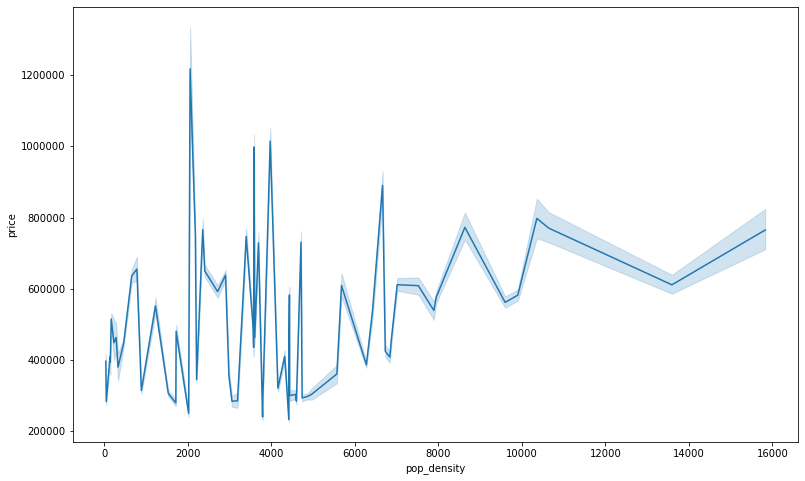

In [9]:
plt.figure(figsize=(13,8))
sns.lineplot(x='pop_density', y='price', data=df)
plt.show()

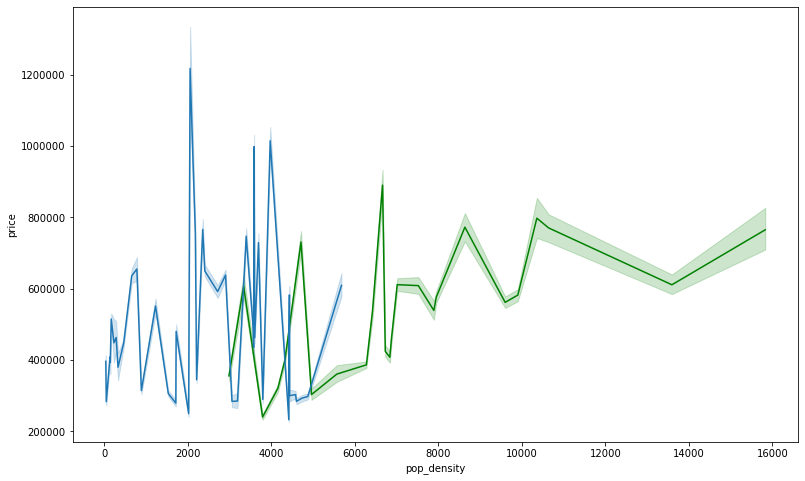

In [21]:
plt.figure(figsize=(13,8))
sns.lineplot(x='pop_density', y='price', data=seattle_proper, color='green')
sns.lineplot(x='pop_density', y='price', data=burbs)

In [18]:
df['in_city'] = df['zipcode'].map(lambda x: np.where(x in options, 1, 0))
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,pop_density,in_city
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,0,1955,0.0,98178,47.5112,-122.257,1340,5650,4966,1
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,400,1951,1991.0,98125,47.7210,-122.319,1690,7639,6879,1
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,0,1933,0.0,98028,47.7379,-122.233,2720,8062,3606,0
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,910,1965,0.0,98136,47.5208,-122.393,1360,5000,6425,1
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,0,1987,0.0,98074,47.6168,-122.045,1800,7503,2411,0


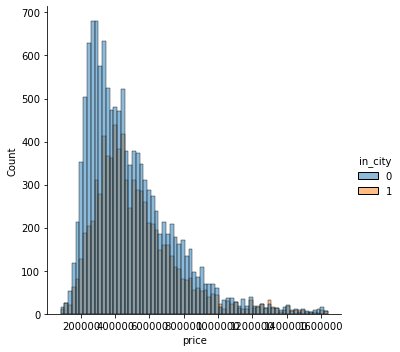

In [19]:
sns.displot(x='price', hue = 'in_city', data=df)

In [23]:
np.corrcoef(x=seattle_proper['pop_density'], y=seattle_proper['price'])[0][1]

0.320054313093329

In [24]:
np.corrcoef(x=burbs['pop_density'], y=burbs['price'])[0][1]

0.019008284393769382

In [25]:
np.corrcoef(x=df['pop_density'], y=df['price'])[0][1]

0.16076649383083563

### When it comes to determining price, population is not a strong metric, however the metric does vary in performace based on whether we are looking at in the city or suburban options. in terms of population density, there is  a clear difference between city and suburban options. Since we are measuring and predicting price and there is no difference in population density in relation to price between city and suburbs, this means that the best approach might be a two model approach. one model to predict price within the suburbs and another to price price within the city. We see that the correlation coefficient between population density and price is stronger when we separate the dataset into city suburban options, which also strengthens the opinion of doing a two-model system.